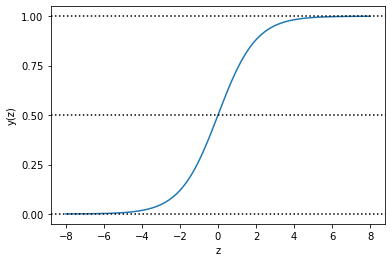

In [1]:
#시그모이드 함수의 그림 그리기
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(input):
    return 1.0 / (1 + np.exp(-input)) # 시그모이드 함수

z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

# iris 데이터셋 활용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [18]:
# 데이터 불러오기
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

In [19]:
# 모델 생성
lg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial') # 클래스가 2개가 아니기 때문에 설정

In [20]:
# 모델 학습
lg.fit(X,y)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [21]:
# 시각화를 위한 바탕 생성
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [22]:
xx, yy

(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]),
 array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]))

In [23]:
# 예측
z = lg.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

C:\Users\user\AppData\Local\Temp/ipykernel_18352/2020278409.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)


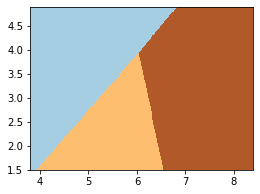

In [24]:
# 결과 시각화
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)

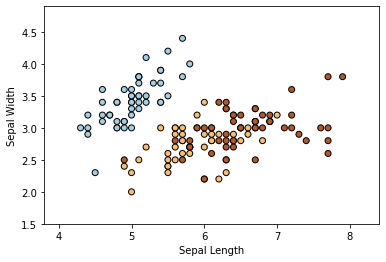

In [15]:
# 산점도로 확인
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_18352/248367651.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)


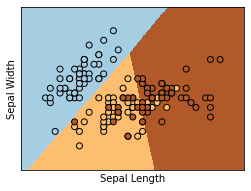

In [25]:
# 한번에 그리기
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [71]:
#그래프의 크기를 세팅
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [72]:
# 데이터 불러오기
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

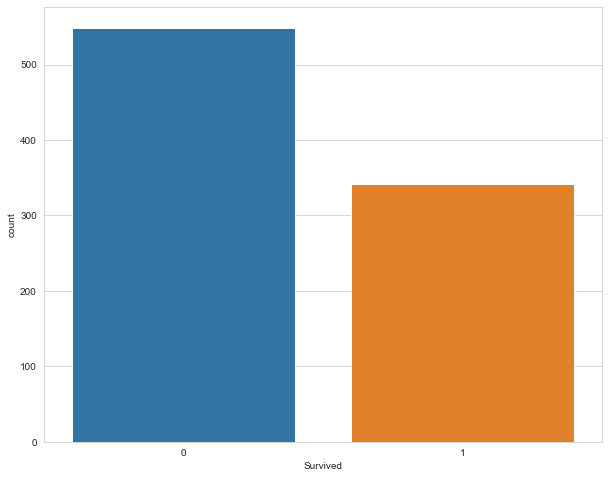

In [60]:
# 생존 여부 시각화
sb.countplot(x='Survived', data=titanic)

In [73]:
# 결측값 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
# 데이터셋 요약정보확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# 불필요한 컬럼 제거
titanic_data = titanic.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

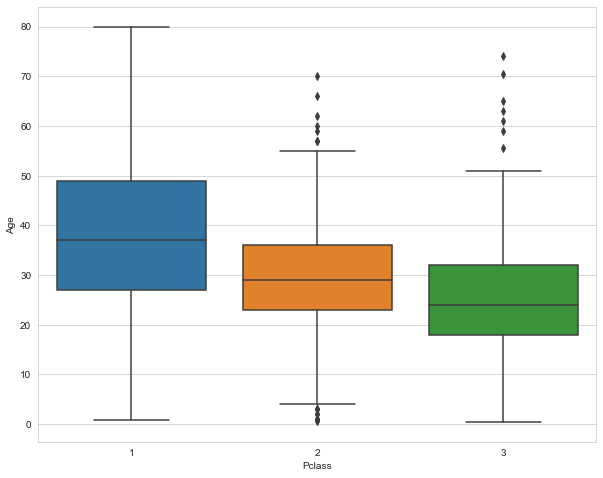

In [76]:
# 박스플롯으로 이상치 확인
sb.boxplot(x='Pclass', y='Age', data=titanic_data)

In [81]:
# 객실 등급에 따라 나이 결측치 채우기
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
        

titanic_data.Age = titanic_data[['Age','Pclass']].apply(age_approx, axis=1)
titanic_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [83]:
# 결측값이 존재하는 행 제거
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [84]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [85]:
# 성별 더미변수로 정수인코딩
gender = pd.get_dummies(titanic_data.Sex, drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [86]:
# 선착장소 정수 인코딩
embark_location = pd.get_dummies(titanic_data.Embarked)
embark_location

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [87]:
# 정수인코딩 후 필요없는 원본 컬럼 제거 및 정수인코딩된 결과 병합
titanic_data.drop(['Sex','Embarked'], axis=1, inplace=True)
titanic_dmy = pd.concat([titanic_data, gender, embark_location], axis=1)
titanic_dmy

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


<AxesSubplot:>

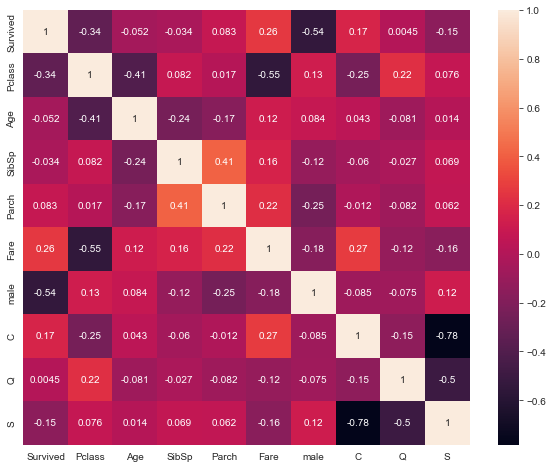

In [88]:
# 피쳐간 상관계수 확인
sb.heatmap(titanic_dmy.corr(), annot=True)

In [89]:
# 불필요한 피쳐 제거
titanic_dmy.drop(['Fare','Pclass'], axis=1, inplace=True)
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   male      889 non-null    uint8  
 5   C         889 non-null    uint8  
 6   Q         889 non-null    uint8  
 7   S         889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 38.2 KB


In [90]:
# target 분리
x = titanic_dmy.iloc[:,1:].values
y = titanic_dmy.iloc[:,0].values

In [91]:
# 학습/테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

# 모델 학습 및 예측
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)

# 혼동행렬 확인
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[141,  26],
       [ 28,  72]], dtype=int64)

In [94]:
# 평가지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       167
           1       0.73      0.72      0.73       100

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

